Package Installation

In [35]:
!pip install panda
!pip install matplotlib
!pip install numpy
!pip install seaborn
!pip install colorama

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import warnings
warnings.filterwarnings('ignore')


Loading the dataset 

In [4]:
xls = pd.ExcelFile('HospitalDatabase.xlsx')
df_ED = pd.read_excel(xls, 'EDVisits')
df_PA = pd.read_excel(xls, 'Patients')
df_AmbV = pd.read_excel(xls,'AmbulatoryVisits')
df_ReAd = pd.read_excel(xls, 'ReAdmissionRegistry')
df_Dis = pd.read_excel(xls, 'Discharges')
df_Pro = pd.read_excel(xls, 'Providers')
df_EDU = pd.read_excel(xls, 'EDUnique')


61. np.arange(1,31).reshape(6,5) Find the array slicing to get the elements with values 11,12,16,17.

In [5]:

np.arange(1,31).reshape(6,5)[2:4,:2]





array([[11, 12],
       [16, 17]])

    62.Create a dataframe with acuity and EDDisposition as the indices and the count of number of patients as the        value.

In [42]:

df1 = pd.read_excel(xls, 'EDVisits', usecols = ['Acuity','EDDisposition'])
df1.groupby(['Acuity','EDDisposition']).size()

Acuity  EDDisposition
1       Admitted          32
        Discharged       558
2       Admitted         116
        Discharged        66
3       Admitted          81
4       Admitted         107
        Discharged        30
5       Admitted         179
        Discharged        30
dtype: int64

    63.List male patients over the age of 60 who have undergone surgery from January-March 2019.

    64.Create a dataframe by splitting provider name to firstname and lastname with names for the columns.

In [8]:
ProviderName =  pd.DataFrame([])

new = df_Pro["ProviderName"].str.split(" ", n = 1, expand = True)
 
# making separate first name column from new data frame
ProviderName["First Name"]= new[0]
 
# making separate last name column from new data frame
ProviderName["Last Name"]= new[1]

ProviderName  

,First Name,Last Name
0,Sally,Sue
1,Mike,Myers
2,Jordan,Michael
3,Ted,Texas
4,Ala,Bama
5,Harry,Kane
6,Barry,Bar
7,Ted,Green
8,Ted,Black
9,Fred,Man


    65.Plot a graph showing the count of patients for the reason visited the hospital.

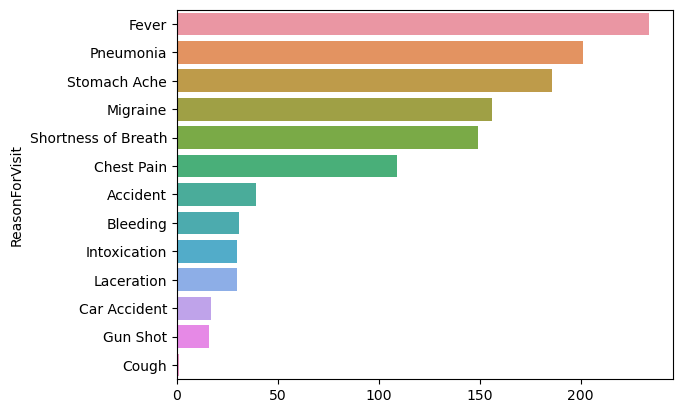

In [43]:
graph = df_ED.groupby(['ReasonForVisit']).size().sort_values(ascending=False)
sns.barplot(y = graph.index, x = graph.values)
plt.show()

    66. Get the FirstName, LastName, DateOfBirth of the Patients whose reason for visit is Migraine. Use EDUnique Sheet for reason for visit.

In [56]:
#merge

# type(df_PA)

df3 = df_PA[['FirstName','LastName','DateOfBirth']]
type(df3)

pandas.core.frame.DataFrame